<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tagup-Data-Science-Exercise" data-toc-modified-id="Tagup-Data-Science-Exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tagup Data Science Exercise</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualize-Data" data-toc-modified-id="Visualize-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualize Data</a></span></li><li><span><a href="#Outlier-Removal" data-toc-modified-id="Outlier-Removal-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier Removal</a></span></li><li><span><a href="#Replot-with-Outliers-Removed" data-toc-modified-id="Replot-with-Outliers-Removed-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Replot with Outliers Removed</a></span></li><li><span><a href="#Feature-Correlations" data-toc-modified-id="Feature-Correlations-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature Correlations</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Detecting-Failure-Mode" data-toc-modified-id="Detecting-Failure-Mode-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Detecting Failure Mode</a></span></li><li><span><a href="#Labeling-Faulty-Mode" data-toc-modified-id="Labeling-Faulty-Mode-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Labeling Faulty Mode</a></span></li><li><span><a href="#Survival-Analysis" data-toc-modified-id="Survival-Analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Survival Analysis</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Detecting-Faulty-Mode" data-toc-modified-id="Detecting-Faulty-Mode-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Detecting Faulty Mode</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Reflection</a></span></li></ul></li></ul></div>

# Tagup Data Science Exercise

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.

You can download the data here: [exampleco_data](https://drive.google.com/open?id=1b12u6rzkG1AxB6wLGl7IBVoaoSoZLHNR)

__Your main objective: to develop an automated method to pinpoint the times of fault and failure in this machine__.  Keep in mind that you will be sharing these results with the executives at ExampleCo, so to the best of your ability, try to explain what you are doing, what you've shown, and why you think your predictions are good.


A few notes to help:
1. A good place to start is by addressing the noise due to communication
   errors.
2. Feel free to use any libraries you like. Your final results should be
   presented in this Python notebook.
3. There are no constraints on the techniques you bring to bear, we are curious
   to see how you think and what sort of resources you have in your toolbox.
4. Be sure to clearly articulate what you did, why you did it, and how the
   results should be interpreted. In particular you should be aware of the
   limitations of whatever approach or approaches you take.
5. Don't feel compelled to use all the data if you're not sure how. Feel free
   to focus on data from a single unit if that makes it easier to get started.
6. Don't hesitate to reach out to datasciencejobs@tagup.io with any questions!

In [350]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from lifelines import KaplanMeierFitter, NelsonAalenFitter, ExponentialFitter
plt.style.use('ggplot')

%matplotlib inline 

# Load Data

In [351]:
def load_data(machine_number):
    data = pd.read_csv('Data/machine_{}.csv'.format(machine_number))
    data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
    data = data.rename(columns = {'Unnamed: 0':'Time', '0': 'Feature 0','1': 'Feature 1', '2': 'Feature 2', '3': 'Feature 3'})
    return data 

machines = [load_data(i) for i in range(0, 20)]

# Exploratory Data Analysis

Are times between time points equal - can this be turned into an additional feature

Is the time period the same for each machine

What is the mean/ variance of each machine by Feature - might need to cleverly aggregate data for plotting

Is there any relation to days of the week

In [352]:
# look at data
machines[0].head(10)

Time  Feature 0  Feature 1  Feature 2  Feature 3
0 2019-01-01 00:00:00.000000000  12.626096   8.803120 -11.809200  10.083961
1 2019-01-01 08:00:09.603201067  10.831994   2.816327  11.554778  21.892853
2 2019-01-01 16:00:19.206402134  21.083510  -0.672645 -17.839178  -1.349024
3 2019-01-02 00:00:28.809603201  32.294495   6.525132 -13.498586  -4.250752
4 2019-01-02 08:00:38.412804268  28.057100   3.691359  21.984744  13.670561
5 2019-01-02 16:00:48.016005335  29.646637  -3.522426   3.364964  -3.015832
6 2019-01-03 00:00:57.619206402  38.902674   1.916522 -10.849385 -17.702242
7 2019-01-03 08:01:07.222407469  33.052626   3.204629  25.474912   1.118645
8 2019-01-03 16:01:16.825608536  25.190551  -5.460431  22.956234  -3.472719
9 2019-01-04 00:01:26.428809603  29.554267  -3.325767  -5.842399 -25.124870

In [353]:
machines[0].describe() # features are centered around 0

Feature 0    Feature 1    Feature 2    Feature 3
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     -0.816016    -1.091308     1.267945     0.165844
std      58.078319    55.965665    56.538700    56.910659
min    -323.954437  -258.780879  -287.153920  -365.362164
25%      -0.008684    -0.008851    -0.008274    -0.007883
50%      -0.000402    -0.000085     0.000669     0.000310
75%       0.007832     0.008373     0.009056     0.008685
max     315.738951   264.374782   281.684102   340.513819

In [354]:
# Check length of data
print(len(machines[0]))
for machine in machines:
    assert len(machine) == len(machines[0])

# Check if timestamps are different
for i in range(0, len(machines) -1):
    assert all(machines[i]['Time'] == machines[i+1]['Time'])
# Each measurement is taken 3 times a day at intervals of just over 8 hours

3000


## Visualize Data 

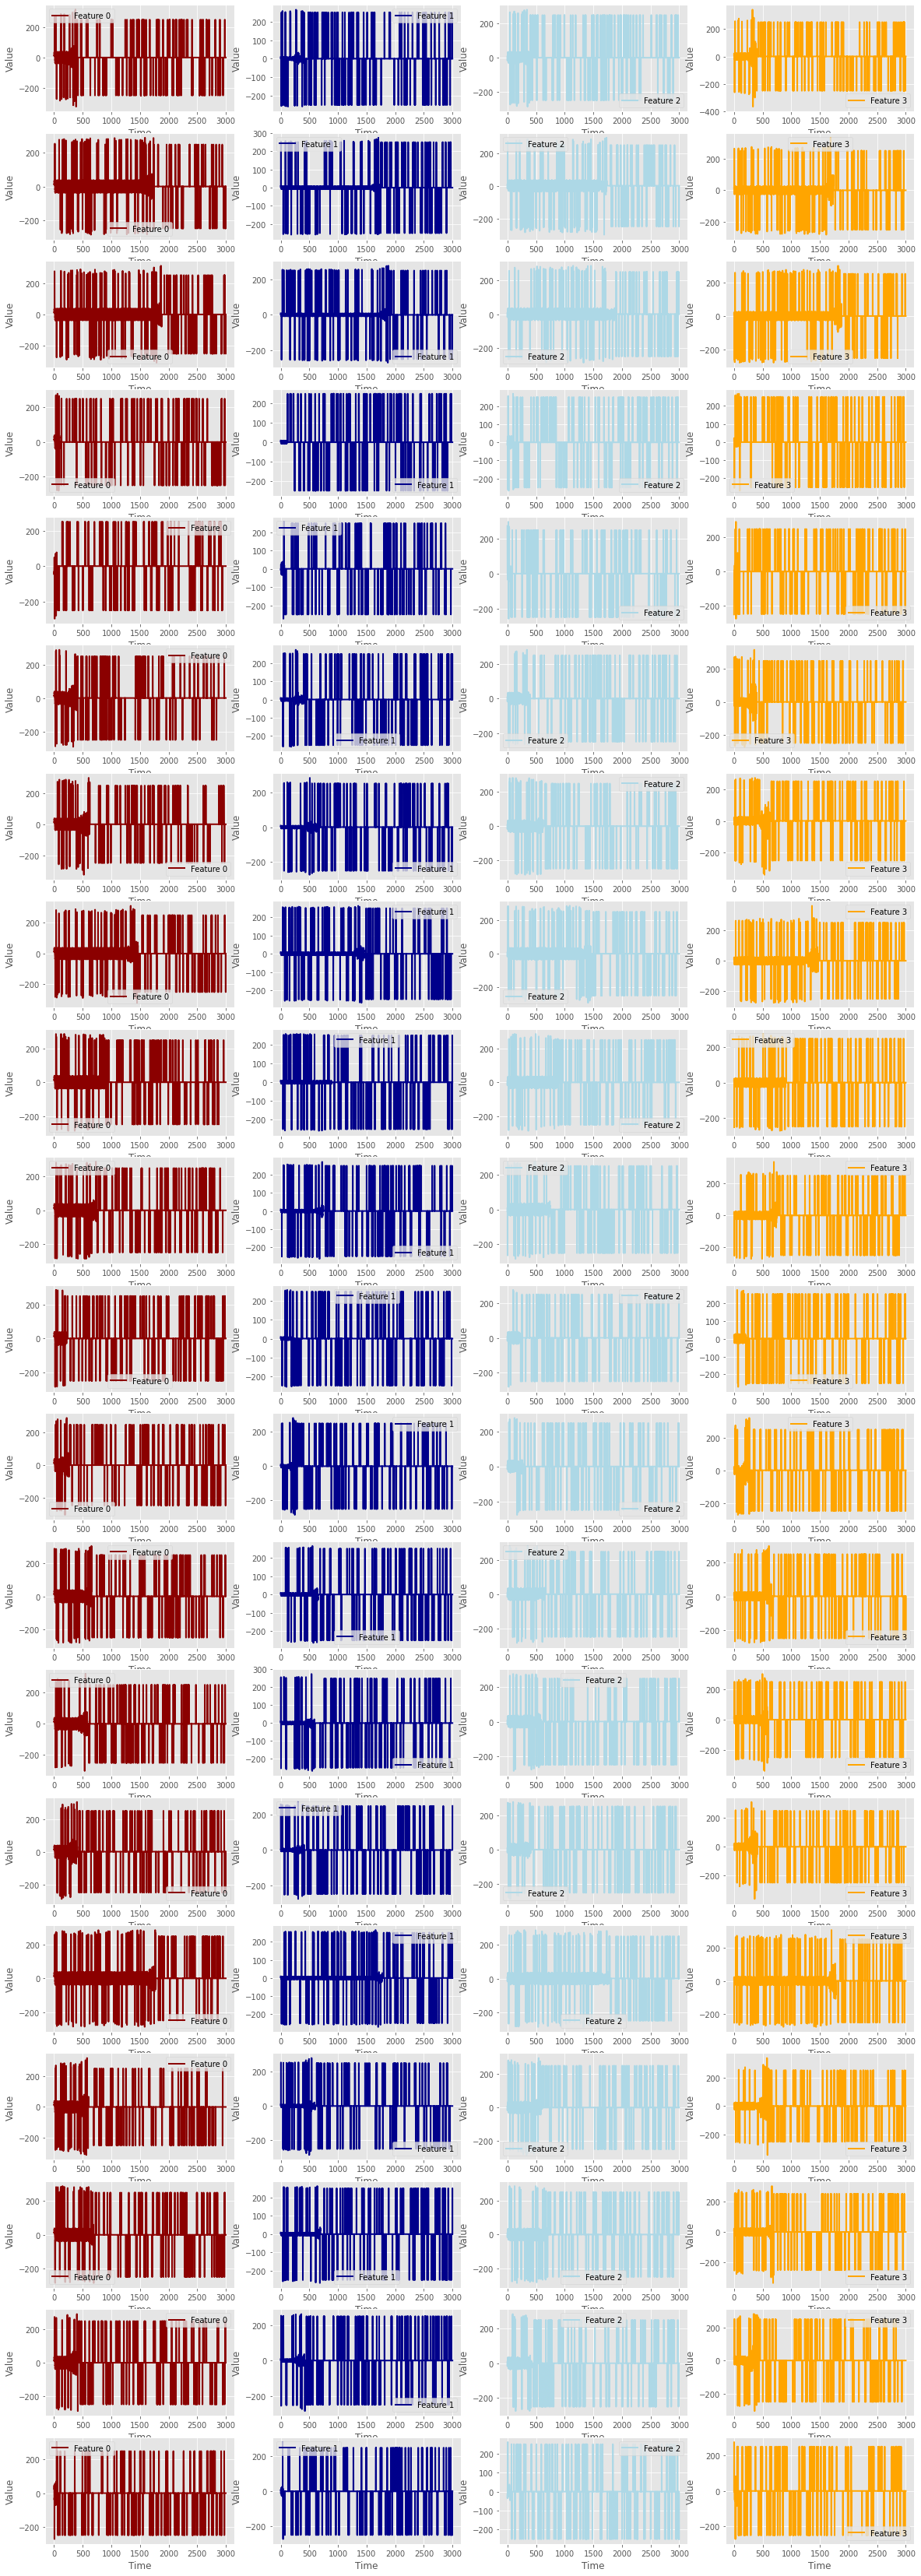

In [355]:
colors = {'0': 'darkred', '1': 'darkblue', '2': 'lightblue', '3': 'orange'}
def plot_feature(machine, feature, ax):
    ax.set_ylabel('Value')
    ax.set_xlabel('Time')
    sns.lineplot(data = machine['Feature {}'.format(feature)], ax = ax, label = 'Feature {}'.format(feature), color = colors[str(feature)], lw = 2)

# Plot all machines and features
rows = len(machines)
cols = 4
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature(machines[i], j, ax[i, j])
fig.savefig('Figures/all_machines_time_series')

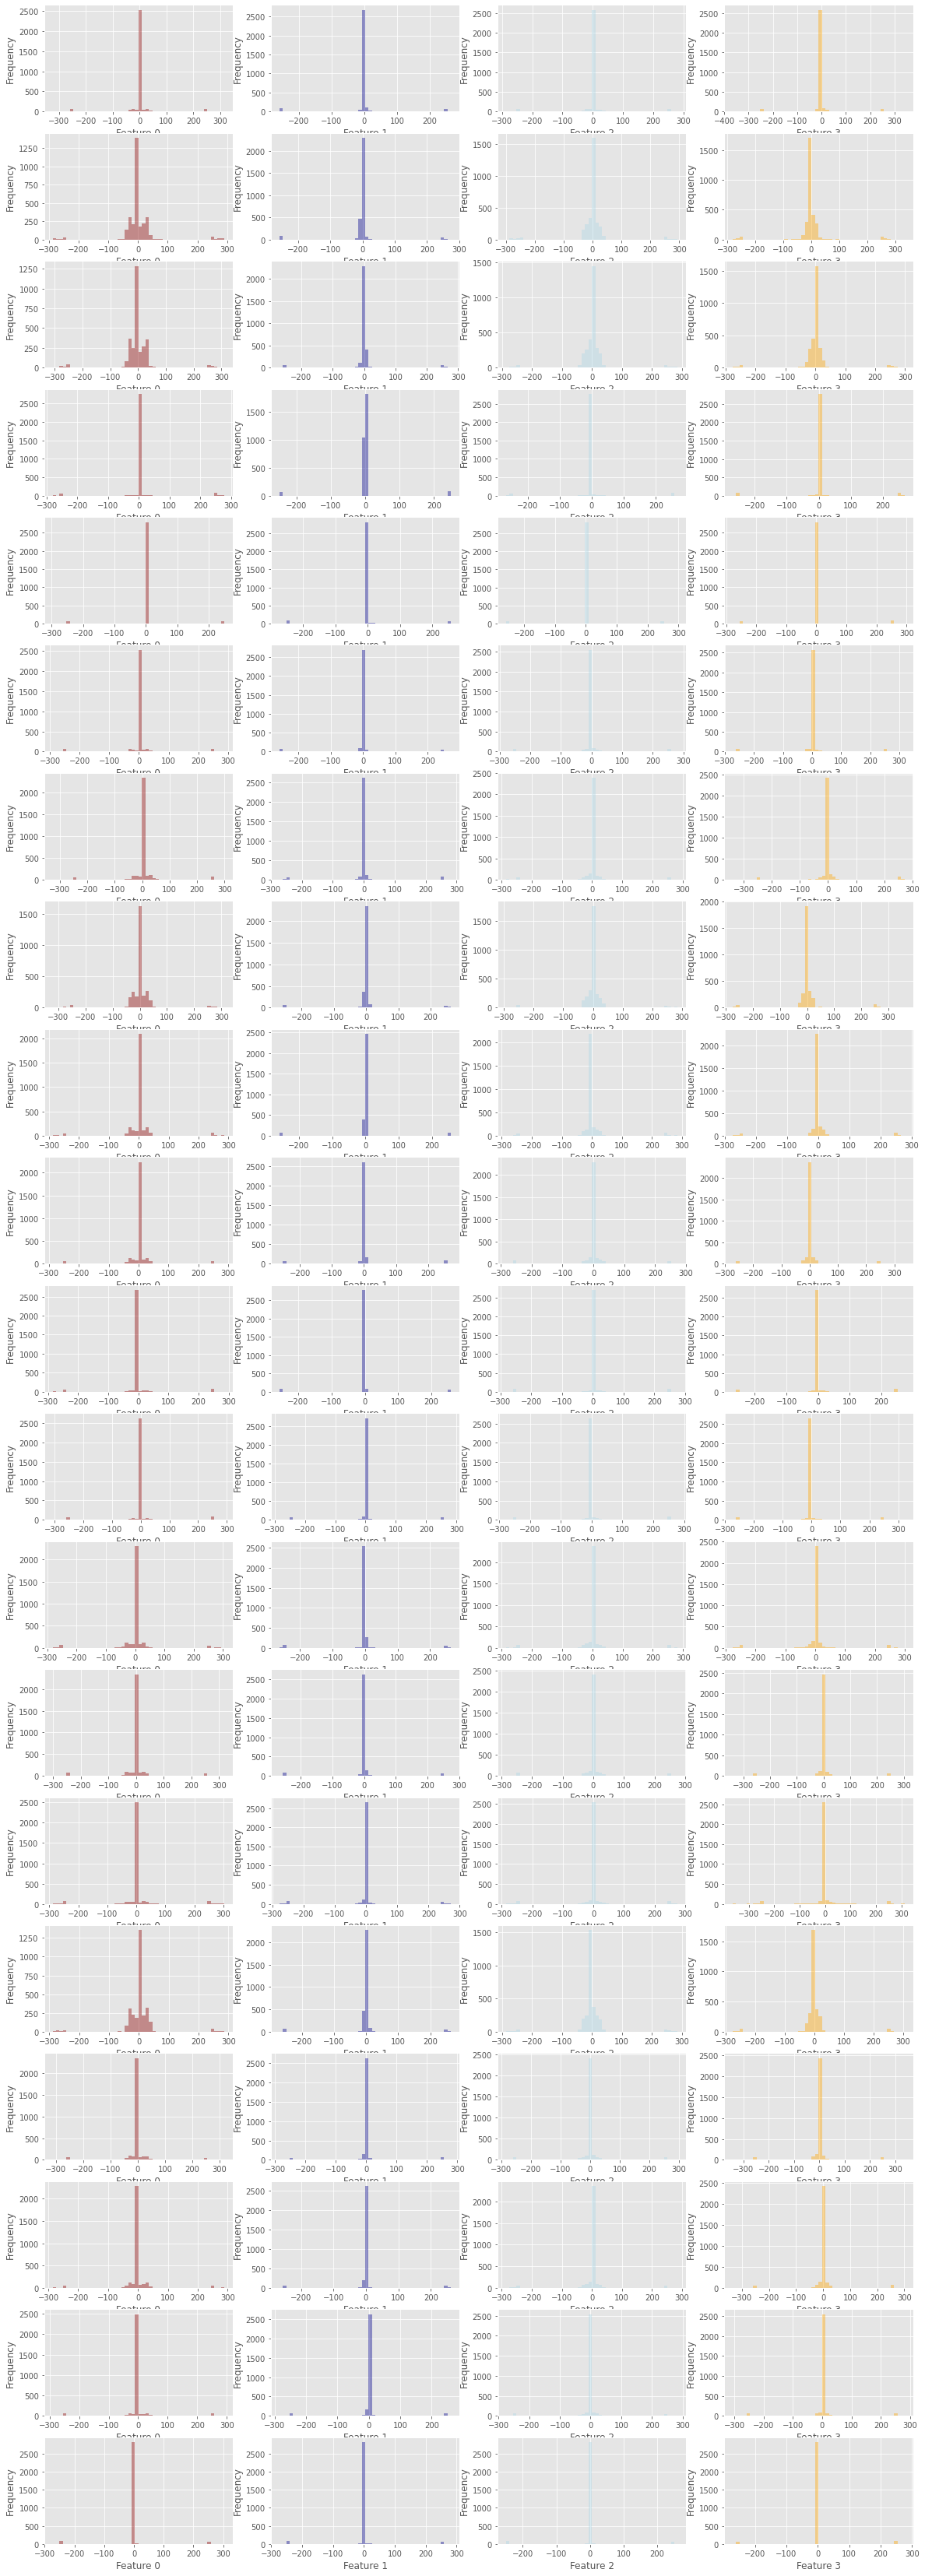

In [356]:
# Look at distributions of data 
def plot_feature_distributions(machine, feature, ax):
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    sns.distplot(machine['Feature {}'.format(feature)], kde = False,  ax = ax, label = 'Feature {}'.format(feature), color = colors[str(feature)])

fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature_distributions(machines[i], j, ax[i, j])
fig.savefig('Figures/all_machines_distributions')


Look to be strong outliers at extreme positive and negative values for each machine and feature which may be associated with communication errors. These outliers also may have made potential relationships difficult to see on the above time series plots. Therefore we should evaluate what the data might look like after removing these outliers. 

## Outlier Removal

In [357]:
def remove_outliers(data):
    """Replace outliers with 0"""
    for i in range(0, 4): # remove values above 200 or below -200
        data.loc[(data['Feature {}'.format(i)] > 200)  | (data['Feature {}'.format(i)] < -200), 'Feature {}'.format(i)] = 0

for i in range(0, len(machines)):
    remove_outliers(machines[i])

## Replot with Outliers Removed

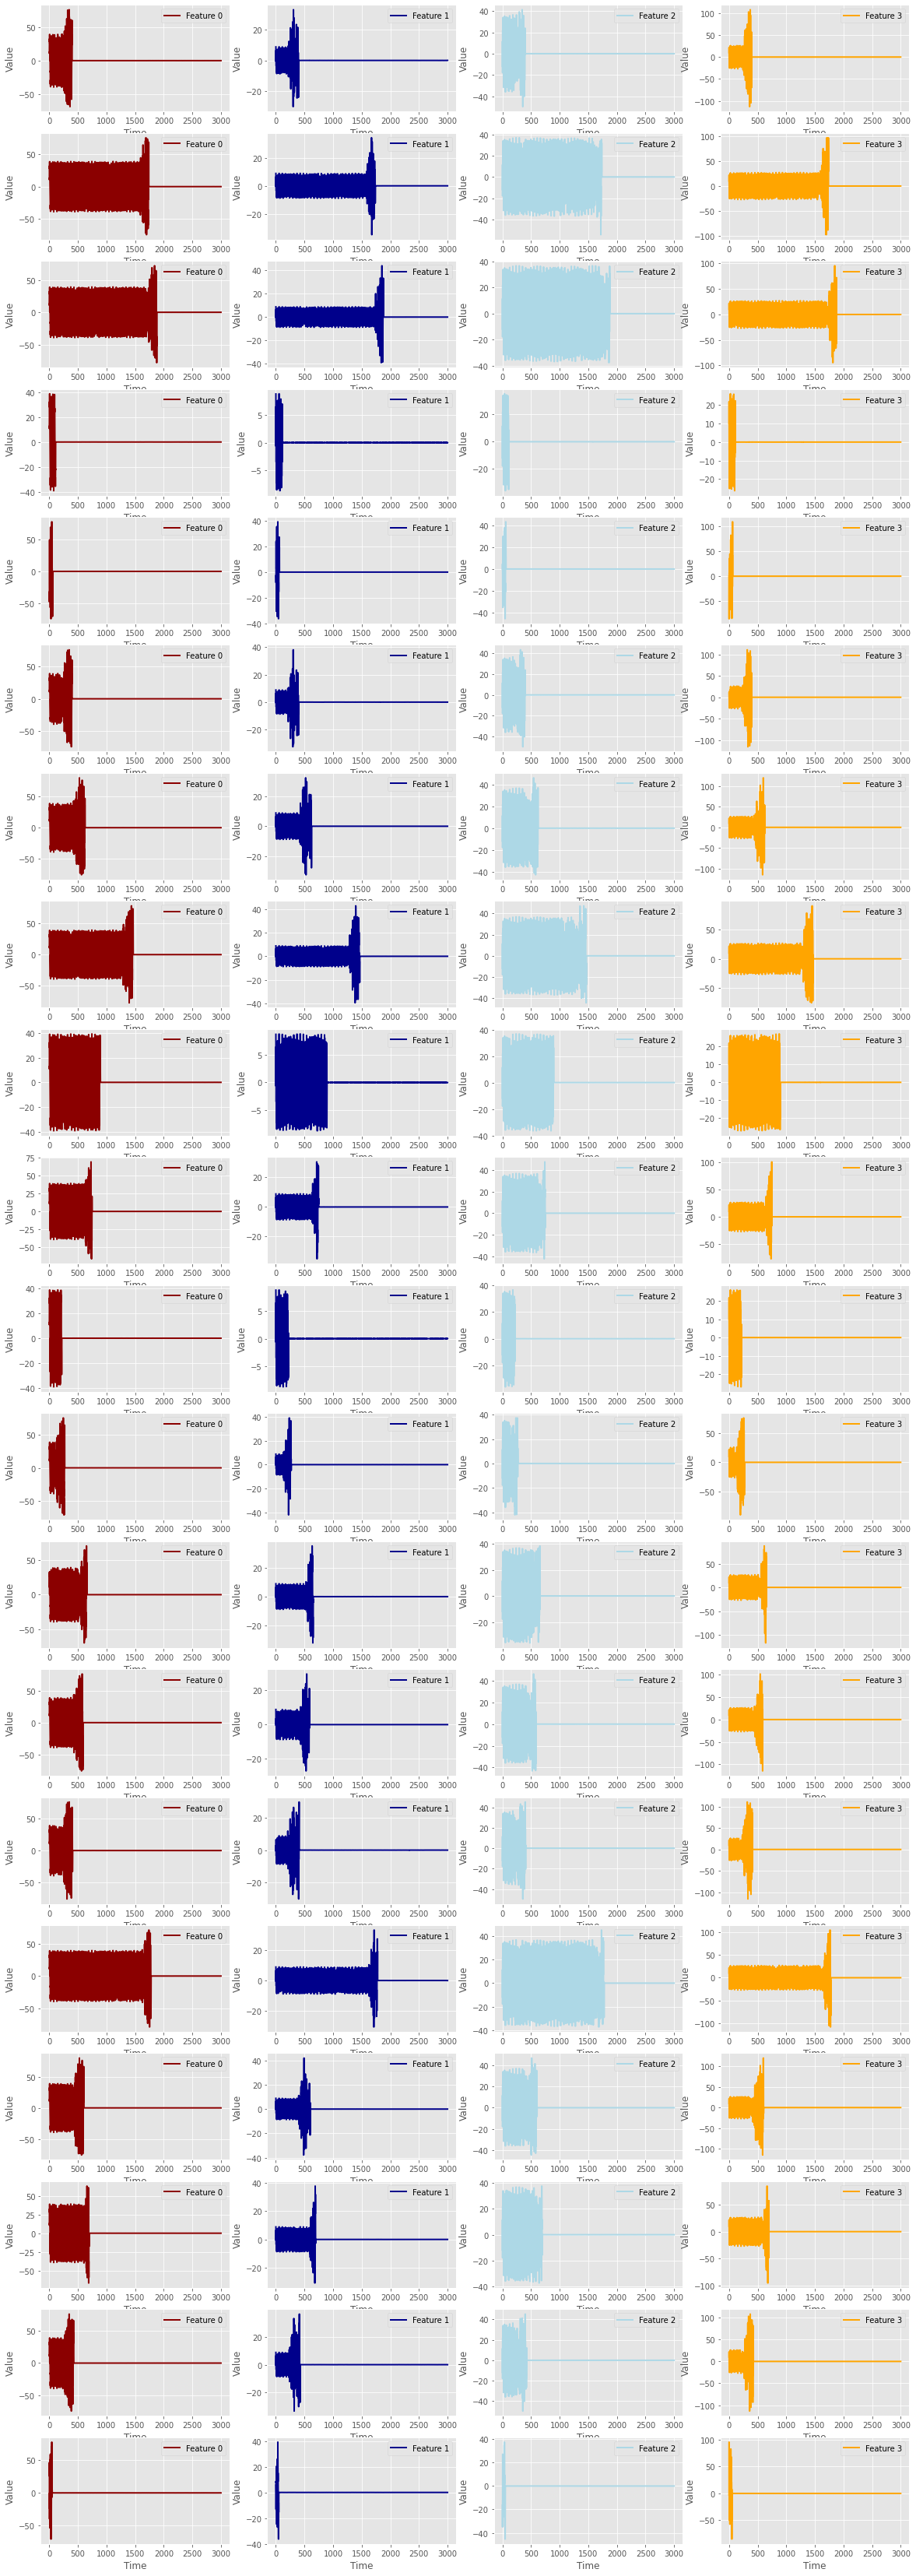

In [358]:
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature(machines[i], j, ax[i, j])
fig.savefig('Figures/all_machines_time_series_cleaned')

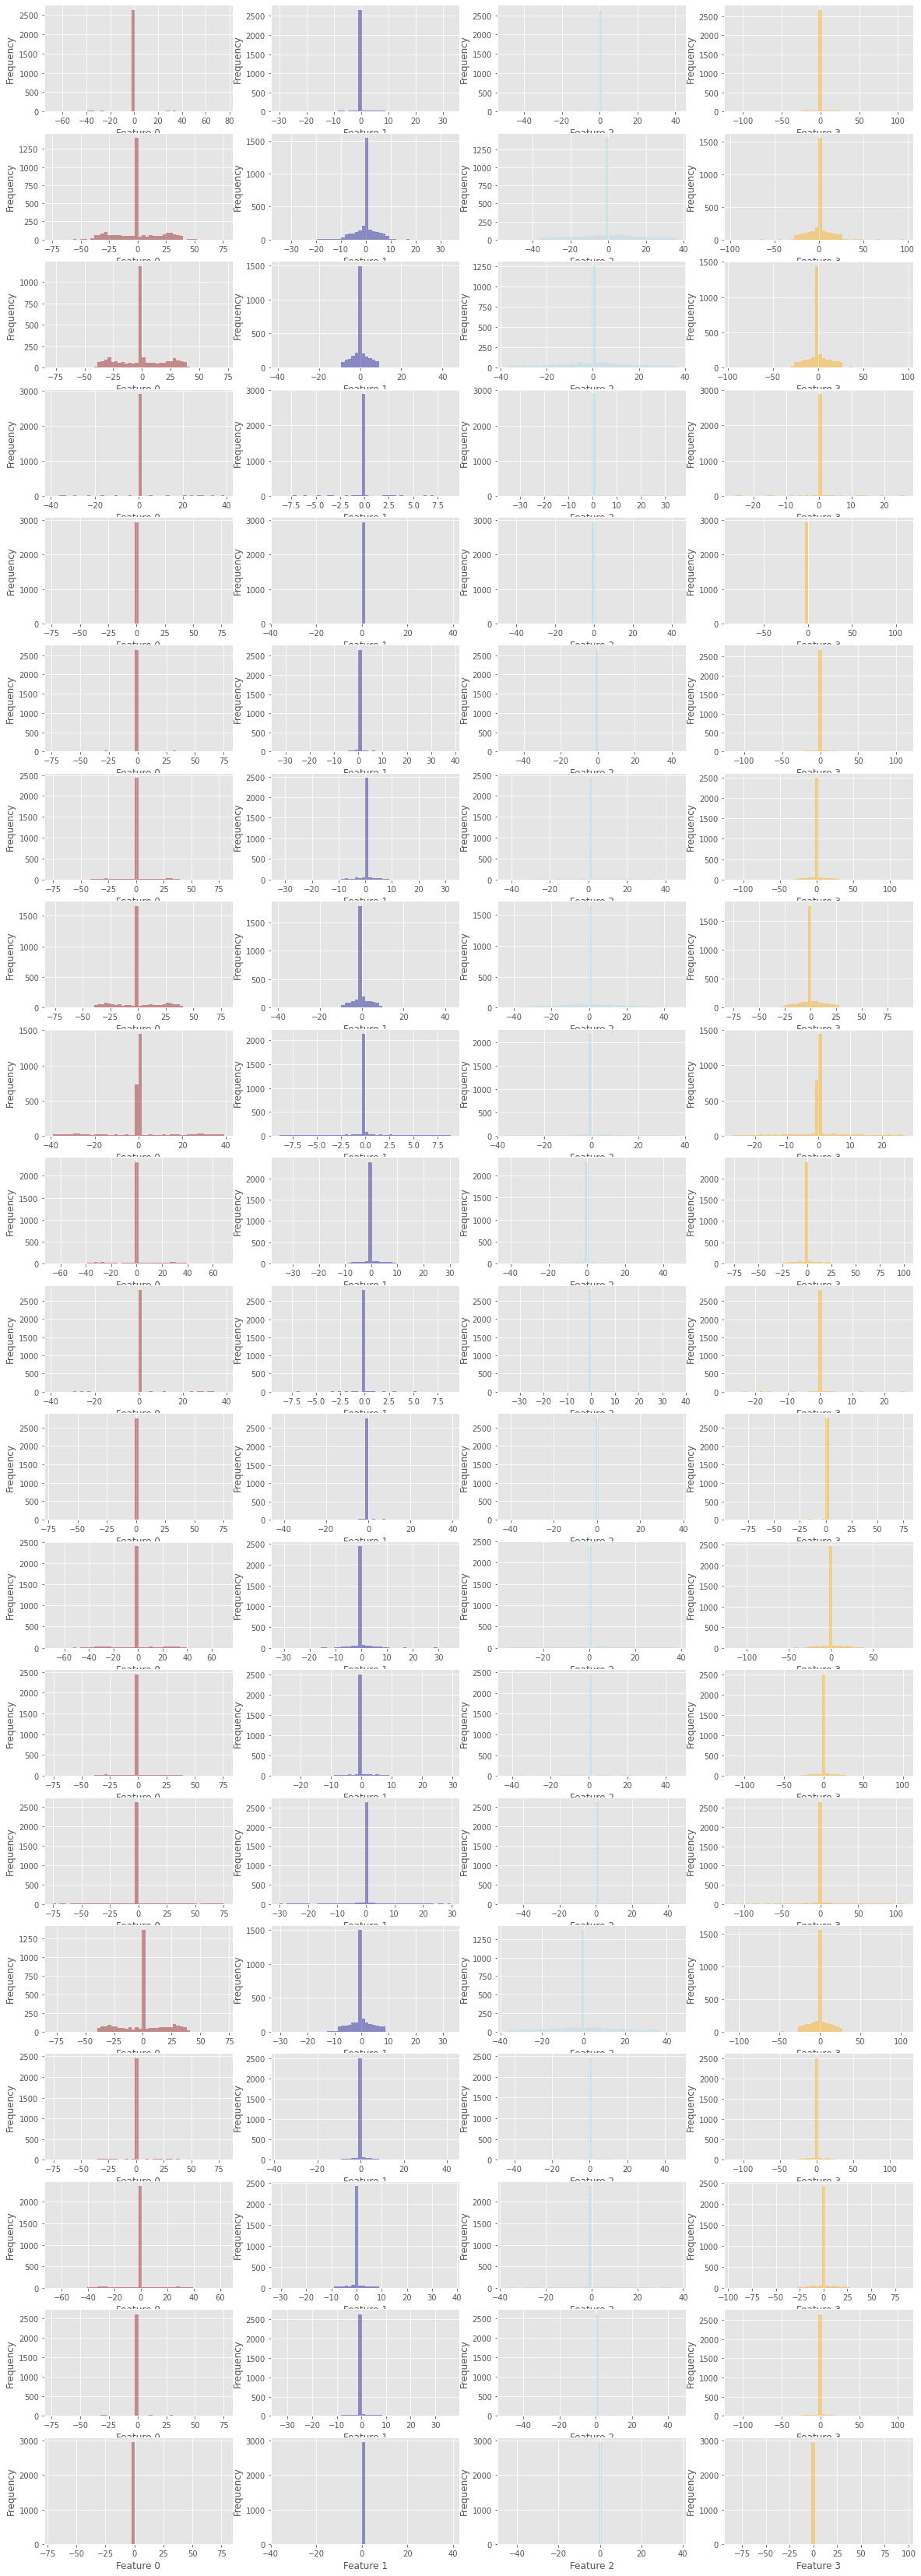

In [359]:
# Plot distributions
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature_distributions(machines[i], j, ax[i, j])
fig.savefig('Figures/all_machines_distributions_cleaned')

## Feature Correlations

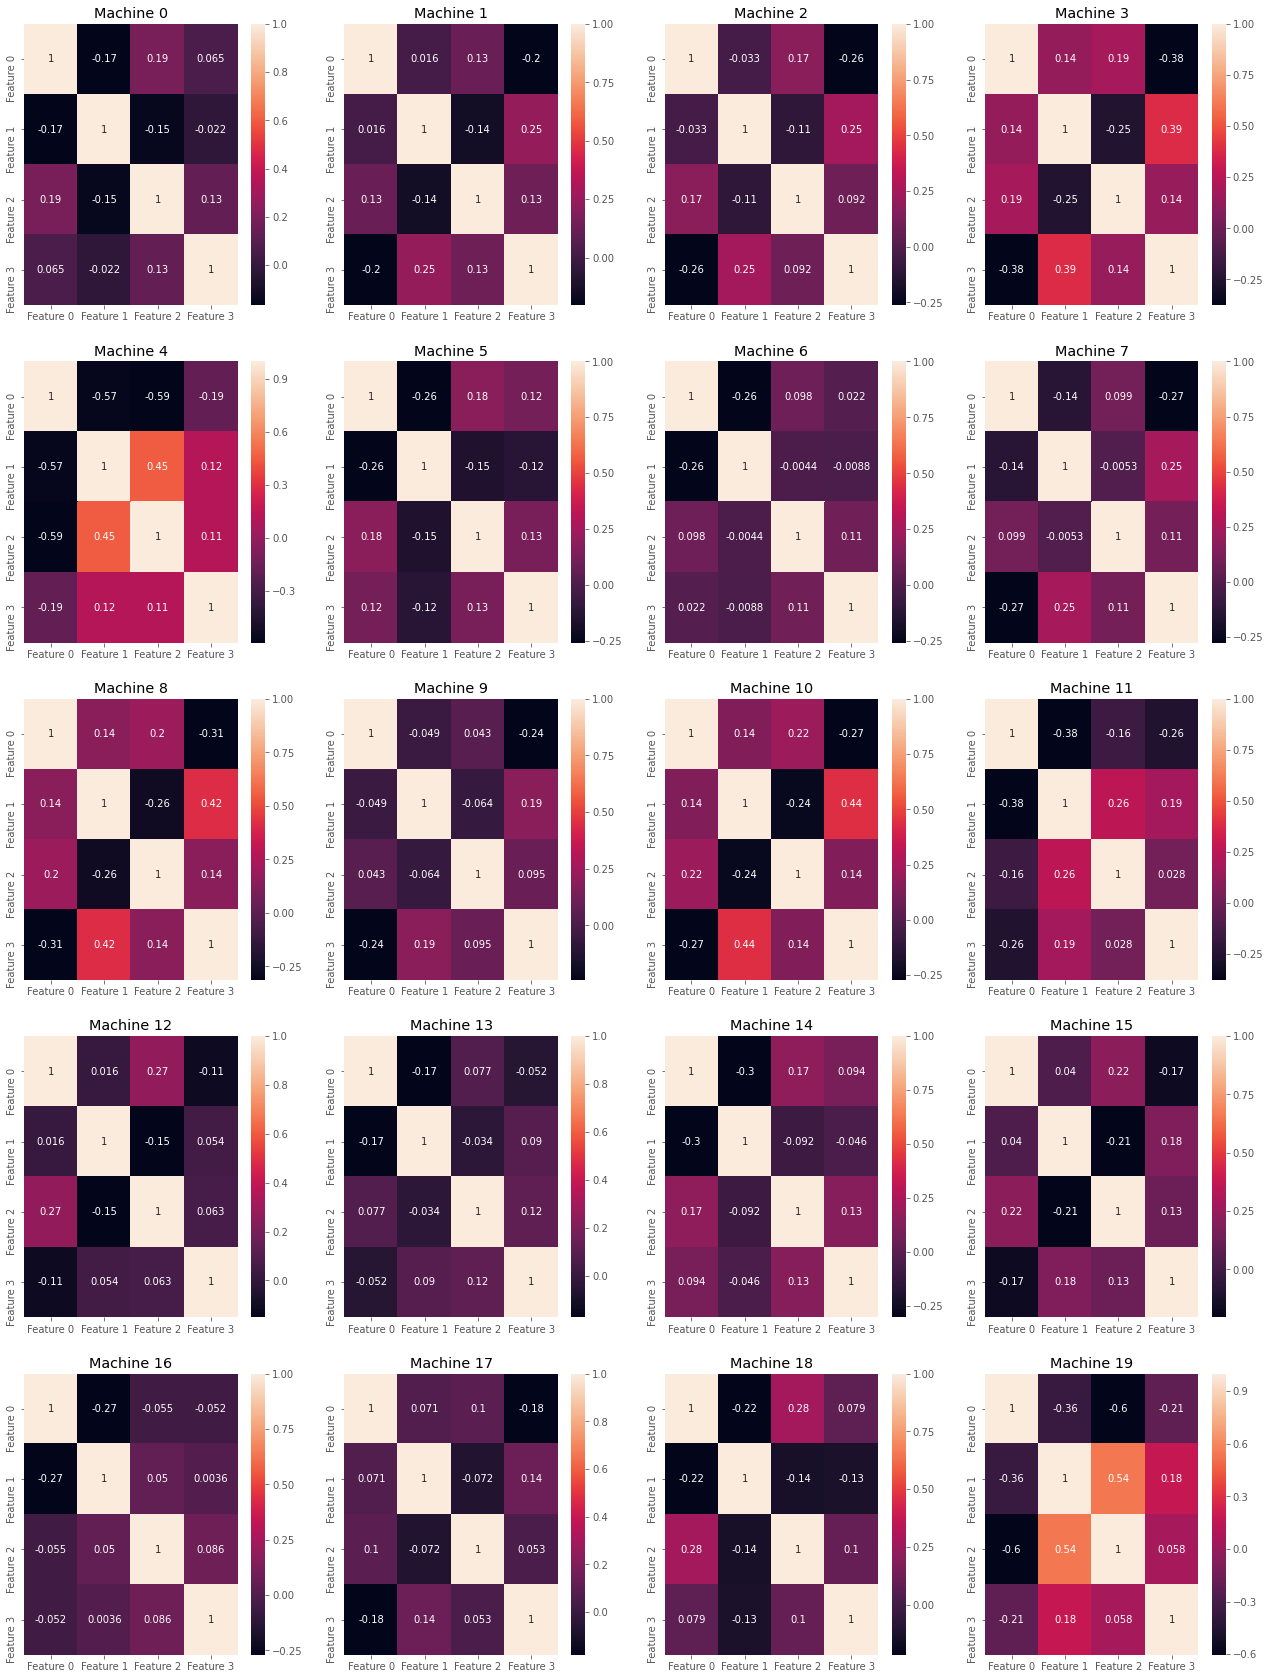

In [360]:
features = ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3']
def plot_correlation(machine, ax):
    """Plot heapmap of correlations between features between machines"""
    cor_matrix = machine[features].corr()
    sns.heatmap(cor_matrix, annot=True, ax = ax)

fig, ax = plt.subplots(5, 4, figsize = (22, 30))
for i, machine in enumerate(machines):
    ax[i//4][i%4].set_title('Machine {}'.format(i))
    plot_correlation(machine, ax[i//4][i%4])
fig.savefig('Figures/all_machines_correlations')

Most of the correlations between features for each machine are very small. 

## Summary

Each machine has a timeseries for each of four different features with 3000 observations collected at equal 8 hour intervals. The times of observations and intervals between them are the exact same which seems to indicate that including the intervals between observations as an additional feature would not be of much value. The data collection process seems to have been suspect to many noisy artifcacts. The histograms of feature values for each machines reveal a small number of extreme outliers at approximately plus or minus 250. Plotting the values of each feature over time reveals that these outliers appear to be randomly distributed and may be obscuring the actual trends in the data. Therefore all outliers were removed and the time series and distribution plots were regenerated. In addtion, for each machine, the correlation between each pair of features in shown. Most of the larger correlations seems to result from machines where features take on values close to zero for much of the
time given. Therfore, correlations between features is not likely to significantly confound any subsequent analysis. Visual examination of the features plotted over time with the outliers removed seems to clearly reveal the 3 regimes that we are looking for. The normal regime is characterized by alternating positive and negative values with relatively even peaks. Machines then enter a faulty regime where the magnitude of the signals appears to increase over time followed by the failure mode with the signals dropping close to zero. Different models can be used to determine when a machine has entered faulty mode. 

# Modeling 

## Detecting Failure Mode
The characteristics of the failure mode are very apparent upon inspecting the graphs of feature values
over time. We can set our failure time to be the point were a moving average of feature values drops below 
a certain threshold. We take the moving average of the absolute values of feature times because positive and negative values could
close to zero and the time series appears fairly symmetric. 

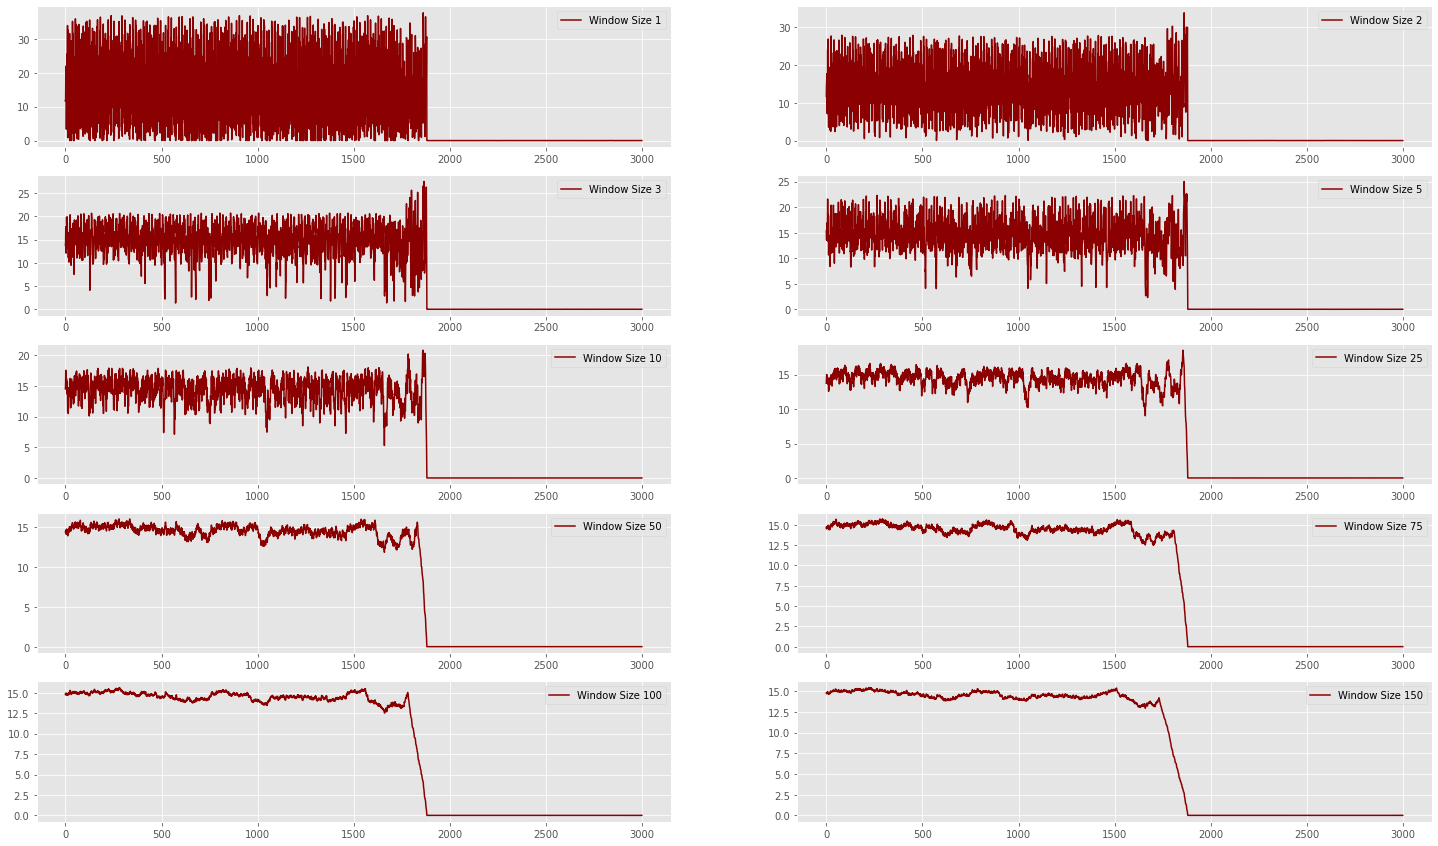

In [361]:
def moving_average(machine, feature, window):
    """Finds the moving average of a feature for a given window size"""
    data = machine[feature]
    n = len(data)
    data = np.array([np.absolute(data[i]) for i in range(0, n)])
    MA = np.array([np.mean(data[i: min(i + window, n-1)]) for i in range(0, n-1)])
    return MA

def plot_ma(machine, feature, window, ax):
    MA = moving_average(machine, feature, window)
    sns.lineplot(data = MA, ax = ax, label = 'Window Size {}'.format(window), color = 'darkred')


fig, ax = plt.subplots(5, 2, figsize = (25, 15))
windows = [1, 2, 3, 5, 10, 25, 50, 75, 100, 150]
for i, window in enumerate(windows):
    plot_ma(machines[2], 'Feature 2', window, ax[i//2][i%2])

We can see that using a window size of 1 which is equivalent to just looking at the absolute value of the signal at each time point will lead to problems because some values still approach 0. Taking moving averages with larger window sizes smoothes out the data so that we can see more of the general trend rather than outliers. In this case, it seems we can use a moving average wiht a window size of 3 to determine when a machine might enter failure mode. We can set failure mode to be when the moving avering with window size 3 drops below 0.25. Using the minimum window size of 5 should allow us to detect failure mode within as short a time as possible. We cannot use window size 2 or 3 because some moving average values replace 0. Window size 3 should allow us to label device failure within a few days. 

In [362]:
def detect_failure(machine, feature):
    MA = moving_average(machine, feature, 5)
    failure_point = np.argmax(MA< 0.25)
    return failure_point

failures = []
for machine in machines:
    entry = {}
    for feature in features:
        entry[feature] = detect_failure(machine, feature)
    failures.append(entry)

failures = pd.DataFrame(failures)
failures

Feature 0  Feature 1  Feature 2  Feature 3
0         397        397        397        397
1        1738       1738       1738       1738
2        1880       1880       1880       1880
3         111        110        111        111
4          63         63         63         63
5         397        397        397        397
6         624        624        624        624
7        1466       1466       1466       1466
8         893        893        894        894
9         747        748        748        748
10        218        217        218        218
11        269        269        269        269
12        655        655        655        655
13        590        590        590        590
14        407        407        407        407
15       1778       1778       1778       1778
16        605        605        605        605
17        695        695        695        695
18        426        426        426        425
19         51         51         51         51

We can see that using this method yields the same result for every feature and therefore gives us a good label for when failure occurs. Plotting the failure times can give us confidence as to their accuracy.

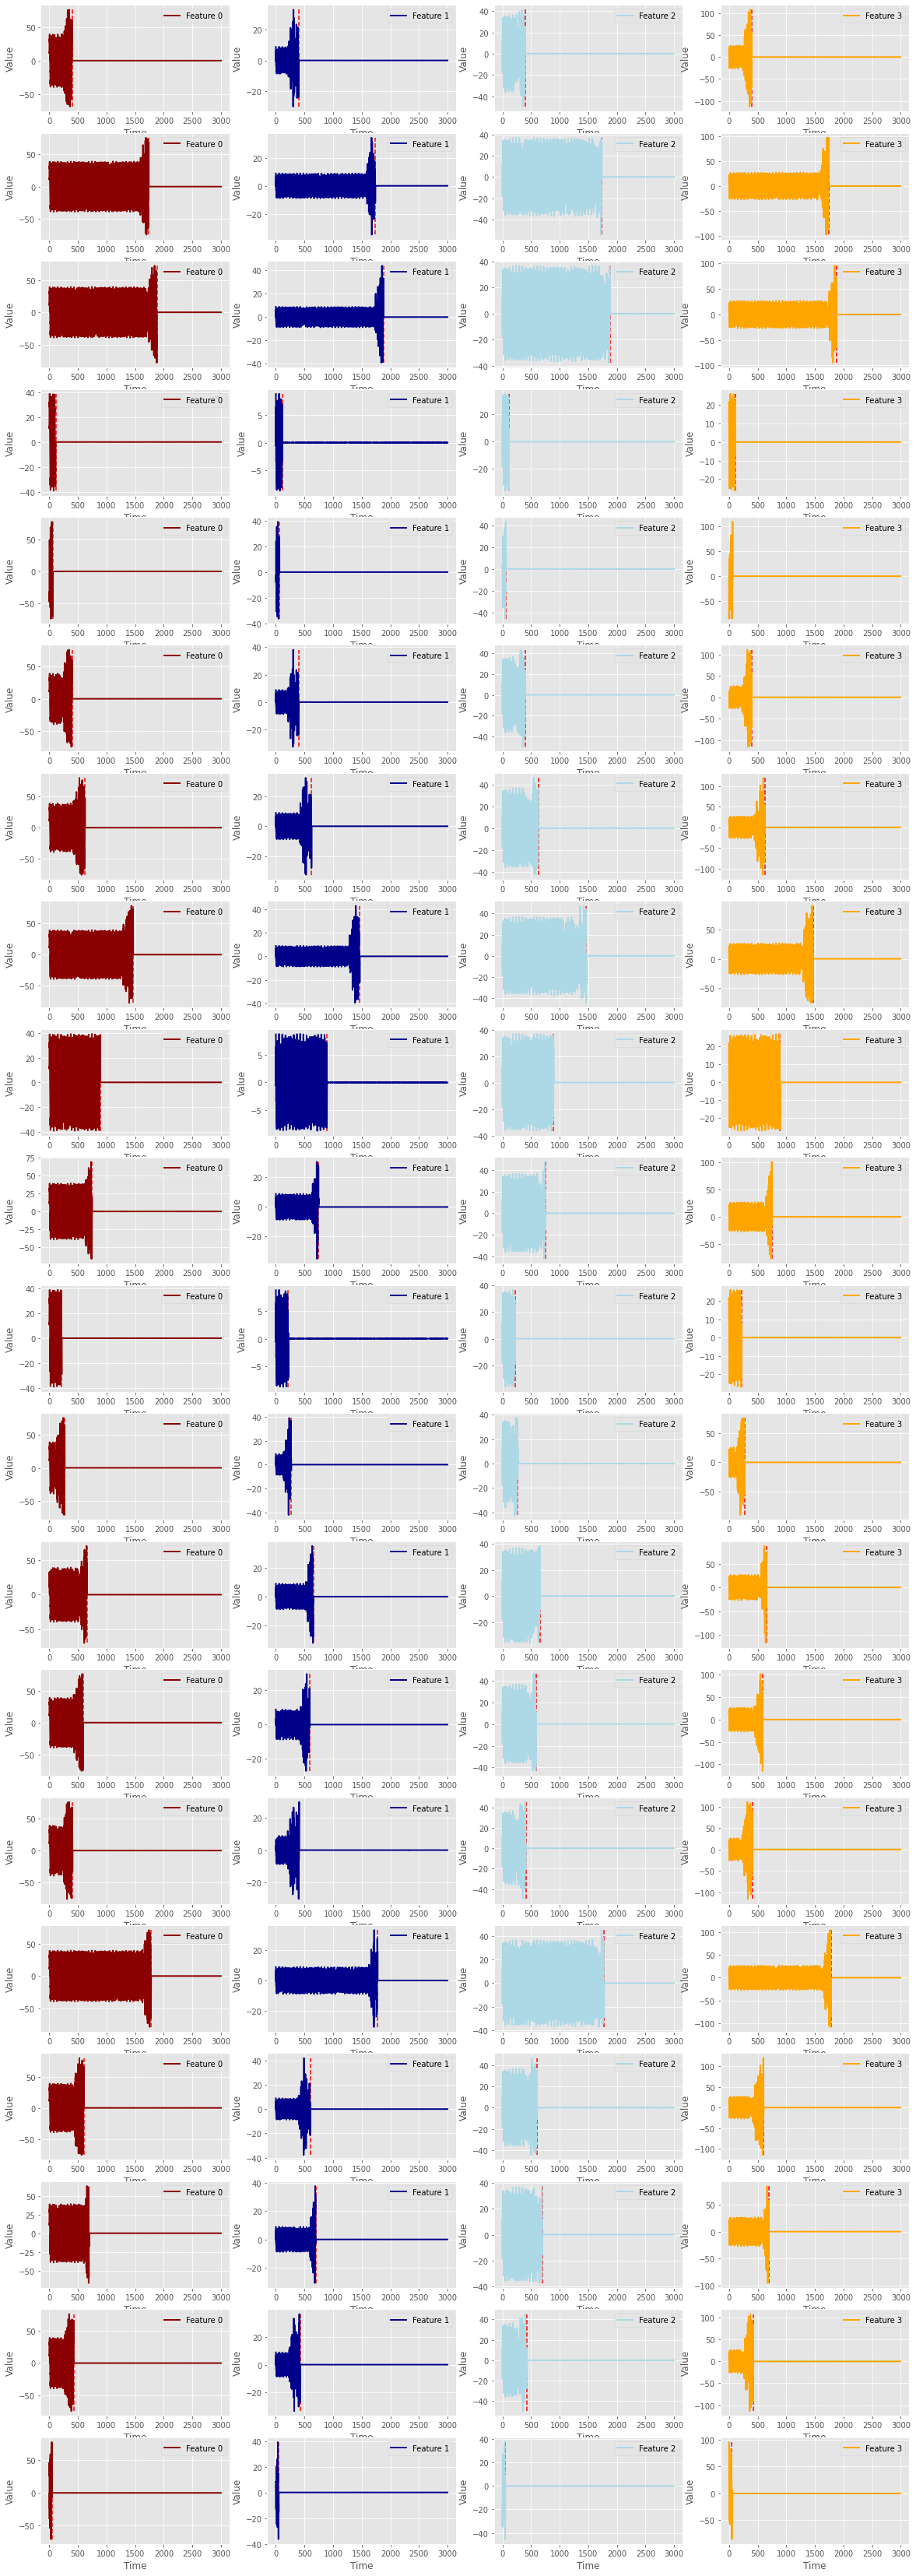

In [363]:
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature(machines[i], j, ax[i, j])
        ax[i,j].vlines(x = detect_failure(machines[i], features[j]), ymin = np.min(machines[i][features[j]]), ymax = np.max(machines[i][features[j]]), linestyles = 'dashed', label = 'Failure Time', color = 'red')
fig.savefig('Figures/all_machines_time_series_failure_times')

## Labeling Faulty Mode 

## Survival Analysis

We can use the population failure times to help predict when machines might start to fail. The Kaplan Meier Curve is a non parametric estimate of the proportion of the population surviving at time t given by the following equation.



In this in the plot below we can see a plot of the esimated population 

$$
\hat{S}(t) = \Sigma_{t_i < t} \frac{n_i - d_i}{n_i}
$$
$d_i$ is the number of deaths(failures) at time $t_i$ while $n_i$ is the surviving population (number of functioning machines) just before time $t_i$
The lifeline package can be used to fit a KM curve to the data. 

605.0

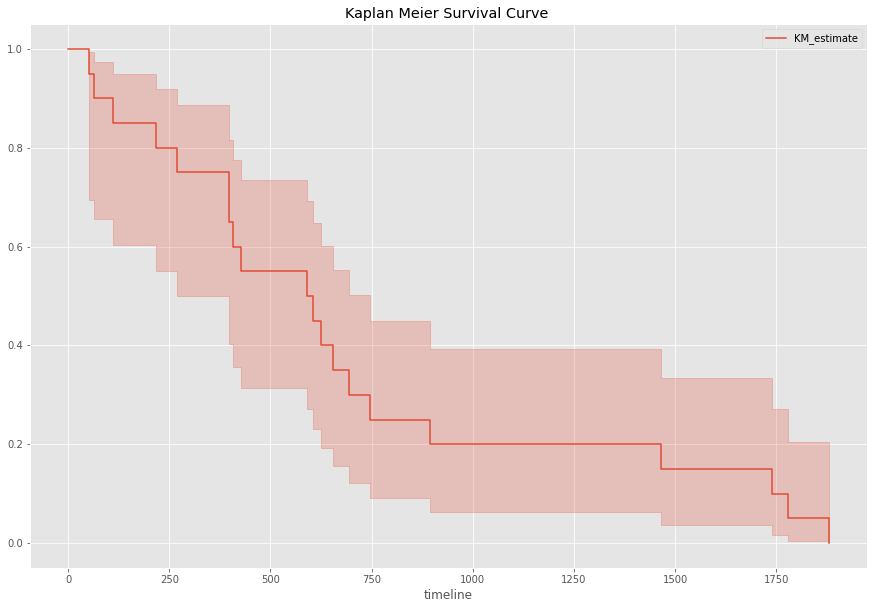

In [364]:
kmf = KaplanMeierFitter()
kmf.fit(failures['Feature 0'])
fig, ax = plt.subplots(1,1, figsize = (15, 10))
ax.set_title('Kaplan Meier Survival Curve ')
kmf.plot(ax = ax)
kmf.median_

We can see from the plot that all machines have failed by time = 1900 or approximately 1.71 years of use. The median time to failure is after around 202 days. This means that for a new machine we would expect to last approximately this long. The estimated survival curve on the plot is not straight indicating that failure times are not evenly distributed throughout the time period. A useful metric to have would be an estimate of the remaining lifetime of a machine at any point in it's lifetime. The survival curve seems like it could be fitted be an exponential decay model with density Density Function:
$$
P(t) = \lambda e^{-\lambda t}
$$
Here could P can represent the probability of a machine surviving to time t. In this case the expected additional lifetime of any machine at time t would be equal to 1 over the rate parameter $\frac{1}{\lambda}$. 

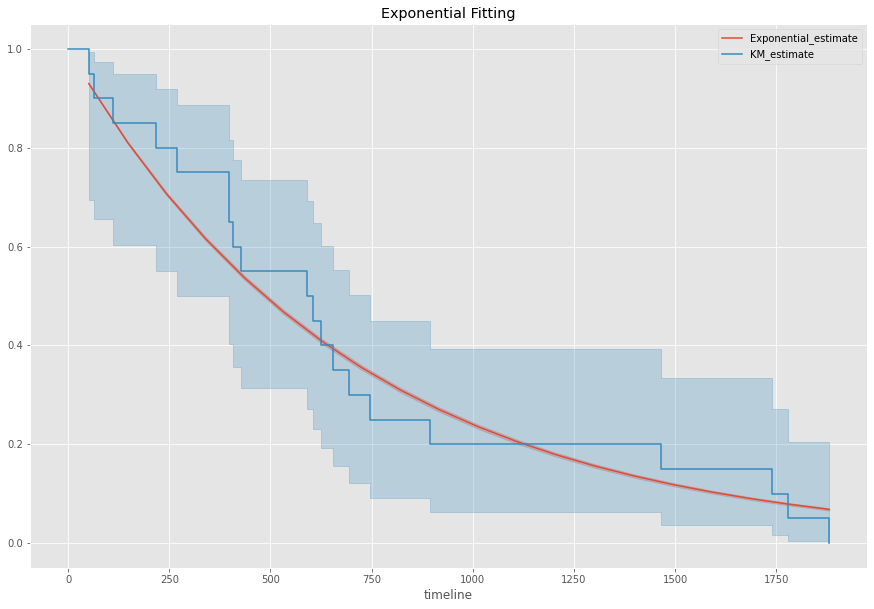

In [365]:
exf = ExponentialFitter().fit(failures['Feature 0'])
fig, ax = plt.subplots(1,1, figsize = (15, 10))
ax.set_title('Exponential Fitting')
exf.plot_survival_function(ax = ax)
kmf.plot(ax = ax)

The exponential fit gives use an expected time to failure at any point of 192 days. However since it does not precisely match the empirical curve nonparametric estimates for expected lifespan will be used. 

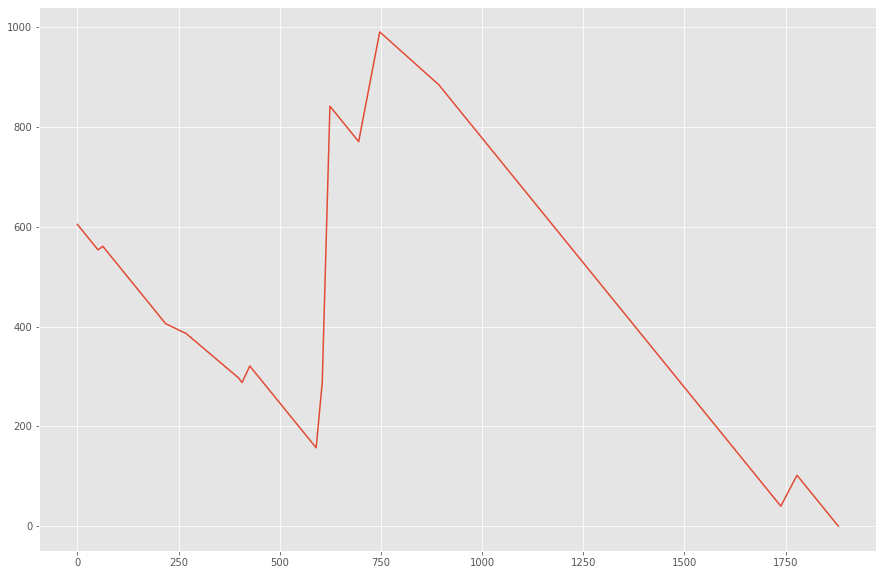

In [366]:
fig, ax = plt.subplots(1,1, figsize = (15, 10))
sns.lineplot(data = kmf.conditional_time_to_event_['KM_estimate - Conditional time remaining to event'], ax = ax)

This plot shows us the estimated remaining lifespan for a machine at any time point. It appears if a machine survives for a certain length of time, it's expected remaining lifetime increases. It's possible this could be explained by regularly scheduled maintenance extending a machine's life if it survives to approximately the two year mark. 

### Summary 
Survival analysis is useful when modeling deaths in a population or in this case failure times of machines. The analysis does however rely on a number of key assumptions. All machines are assumed to have identical characteristics and assumed to all be new or at identical levels of wear and tear at the beginning of the data collection period. In addition there are risks using nonparametric models with such a small sample size. It's possible that a much larger sample size would be needed to accurately determine such variations in expected survival time. There does seem to be strong evidence that the failure times are not randomly distributed. In fact, the exponential decay model makes a lot of sense in the context of machine failures where we might expect a proportion of machines p to fail during a time period t. 

## Detecting Faulty Mode

Time between entering faulty mode and failure 
Labeling faulty mode for each time 
Can the amplitude or magnitude of signals predict failure time?


To get a better look at what is going on with the signals during normal and faulty modes we can zoom in on sections of the data. 

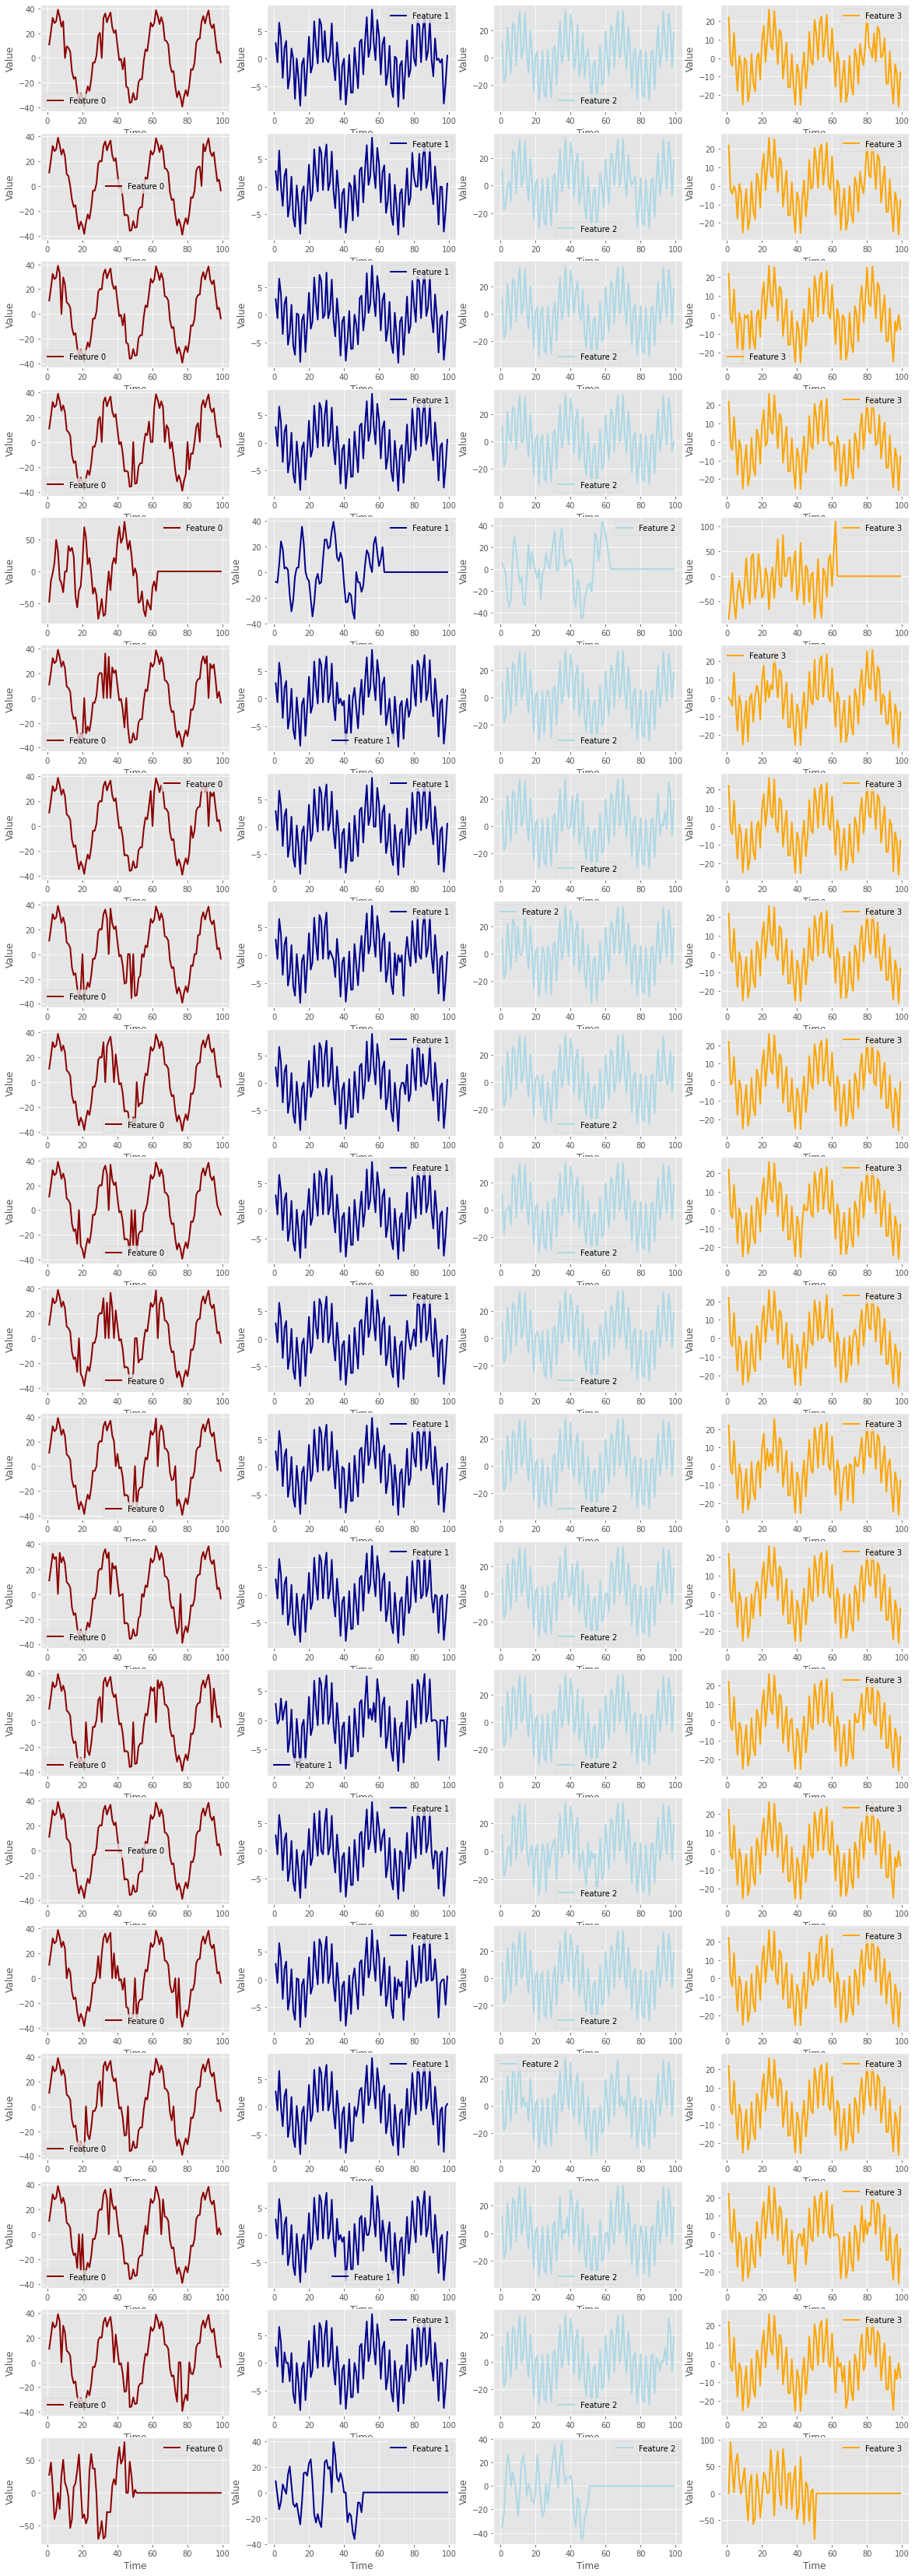

In [367]:
# Plot first 30 Days of Data
colors = {'0': 'darkred', '1': 'darkblue', '2': 'lightblue', '3': 'orange'}
def plot_feature_start(machine, feature, ax):
    ax.set_ylabel('Value')
    ax.set_xlabel('Time')
    sns.lineplot(data = machine['Feature {}'.format(feature)][1:100], ax = ax, label = 'Feature {}'.format(feature), color = colors[str(feature)], lw = 2)

rows = len(machines)
cols = 4
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature_start(machines[i], j, ax[i, j])
fig.savefig('Figures/all_machines_time_series_start')

From these plots we can observe the structure of the data during normal mode. The time series for each wave appear to follow a sinusoidal patter with a second level of sinusoidal noise added on top. The period of the peaks appears to be approximately equal across machines and across different features and is about 8 days. It doesn't quite match a weekly period where we might possibly expect to see this sort of cyclic variation in a real life situation. The magnitude of the peaks do vary by feature but within a feature are consistent across machines. For example, feature 1 consistently varies between -5 and -5 for each machine. The major deviations from the pattern visible on these plots appear to be representative of entering faulty mode early on. The magnitudes of the peaks on thse plots seem to be larger and thus suggest a simple method to determine faulty mode 

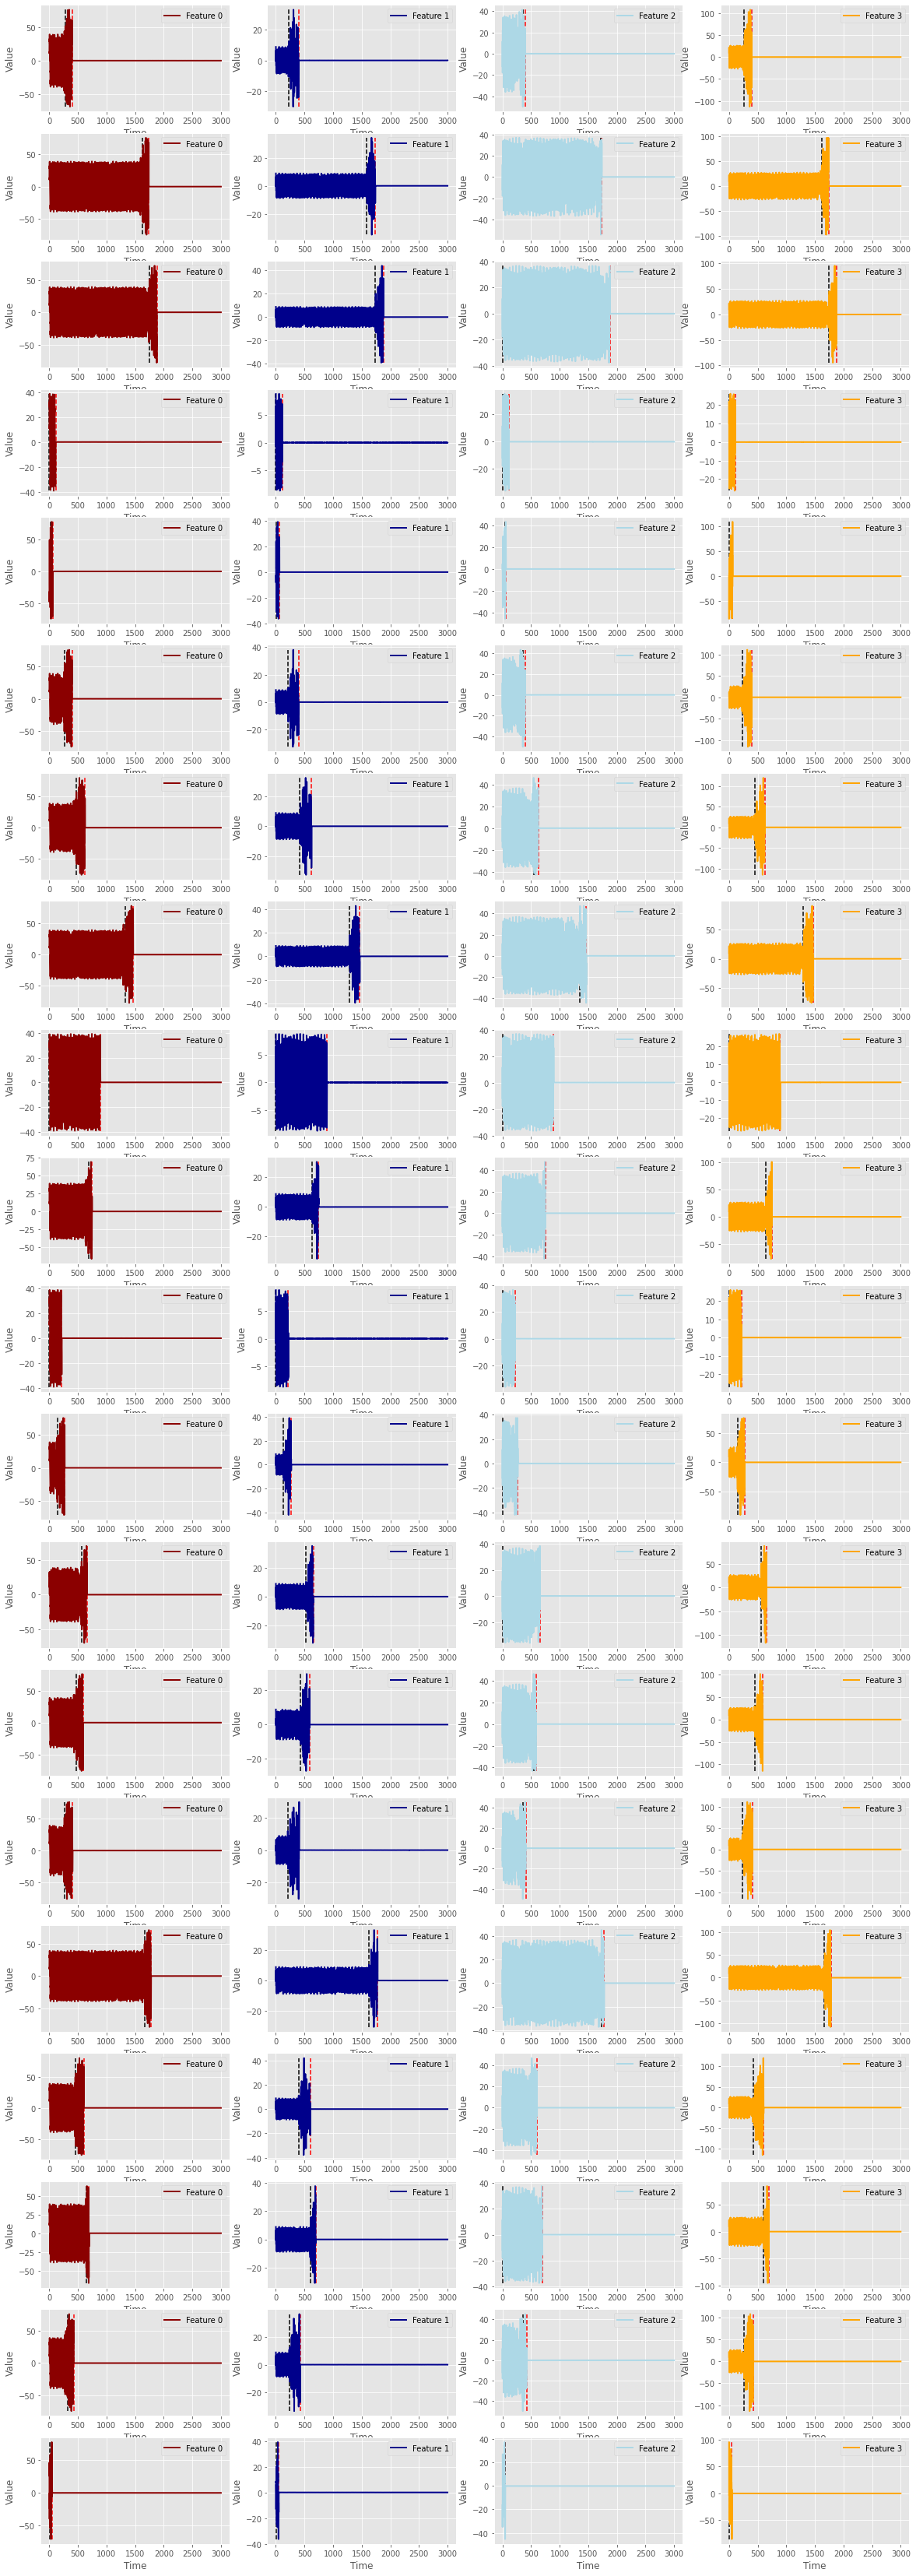

In [368]:
# Determine
thresholds = {'Feature 0': 40 , 'Feature 1': 8, 'Feature 2': 35, 'Feature 3': 25 }

def detect_fault(machine, feature):
    threshold = thresholds[feature]
    n = len(machine[feature])
    data = np.array([np.absolute(machine[feature]) for i in range(0, n)])
    faulty_point = np.argmax(data[0]  > threshold * 1.25) # Build in slight error tolerance
    return faulty_point


# We can plot where these predicted faulty times fall 
fig, ax = plt.subplots(rows, cols, figsize = (20, 60))
for i in range(0, rows):
    for j in range(0, cols):
        plot_feature(machines[i], j, ax[i, j])
        ax[i,j].vlines(x = detect_failure(machines[i], features[j]), ymin = np.min(machines[i][features[j]]), ymax = np.max(machines[i][features[j]]), linestyles = 'dashed', label = 'Failure Time', color = 'red')
        ax[i,j].vlines(x = detect_fault(machines[i], features[j]), ymin = np.min(machines[i][features[j]]), ymax = np.max(machines[i][features[j]]), linestyles = 'dashed', label = 'Faulty Time', color = 'black')

fig.savefig('Figures/all_machines_time_series_failure_and_faulttimes')

In [369]:
faults = []
for machine in machines:
    entry = {}
    for feature in features:
        entry[feature] = detect_fault(machine, feature)
    faults.append(entry)
faults = pd.DataFrame(faults)
faults

Feature 0  Feature 1  Feature 2  Feature 3
0         280        220        356        259
1        1632       1590       1719       1621
2        1753       1736          0       1748
3           0          0          0          0
4          17          4         47          1
5         262        216        356        230
6         470        421        545        452
7        1332       1292       1356       1298
8           0          0          0          0
9         683        637        740        647
10          0          0          0          0
11        141        129          0        149
12        569        525          0        563
13        473        431        545        459
14        264        208        356        233
15       1669       1625       1731       1662
16        459        399        504        419
17        654        600          0        605
18        315        234        356        268
19          9          3         47          2

In [370]:
faults = faults.drop(columns = ['Feature 2'])
fault_times = faults.min(axis = 1)
results = pd.DataFrame()
results['Machines'] = ['Macine {}'.format(i) for i in range(0,  20)]
results['Faulty Times'] = fault_times
results['Failure Times'] = failures['Feature 0']
results['Faulty Duration'] = results['Failure Times'] - results['Faulty Times']
results

Machines  Faulty Times  Failure Times  Faulty Duration
0    Macine 0           220            397              177
1    Macine 1          1590           1738              148
2    Macine 2          1736           1880              144
3    Macine 3             0            111              111
4    Macine 4             1             63               62
5    Macine 5           216            397              181
6    Macine 6           421            624              203
7    Macine 7          1292           1466              174
8    Macine 8             0            893              893
9    Macine 9           637            747              110
10  Macine 10             0            218              218
11  Macine 11           129            269              140
12  Macine 12           525            655              130
13  Macine 13           431            590              159
14  Macine 14           208            407              199
15  Macine 15          1625           1778              153
16  Macine 16           399            605              206
17  Macine 17           600            695               95
18  Macine 18           234            426              192
19  Macine 19             2             51               49

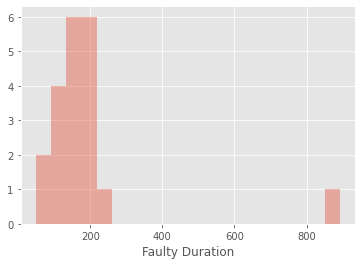

In [371]:
sns.distplot(results['Faulty Duration'], kde = False, bins = 20)

In [372]:
np.median(results['Faulty Duration'])/3

52.0

From the plots, the faulty times detected using this method appear to be reasonable. I removed the results based on Feature 2 because feature 2 seemed to have less distinction between normal and faulty regimes and yielded inconsistent results to the other machines. For the final faulty time, I used the first indication of a fault across the 3 remaining features. This choice was made in order to detect machine's entering faulty mode as quickly as possible. In the real world use case, it may be much better to mark a machine as faulty too early rather than too late. The median time between entering entering faulty mode and failure was 52 days which gives a good amount of leeway to get machines repaired. There was one major outlier which appeared to fail without entering an intermediate faulty regime. 

# Conclusions

## Executive Summary
A simple rule based method can be used to automatically detect when a machine enters faulty mode and then failure mode. The methods described above are easy to implement and highly accurate at detecting faults and failures. Based on this analysis faults can be detected in time for the machine to be repaired in 19/20 cases. In addition, failure can be detected within a day or two. Making some additional assumptions we can estimate the remaining lifetime of a machine. For example at the beginning of the time period, a machine might be expected to last for 605 days while after running for 1500 days, it might only be expected to run for 200 more days. These predictions may be innacurate at these low sample size but could be very useful in forcasting the number of repairs that might be needed in a certain time period. 

## Reflection 

The key to this assignment was identifying the noise due to communication errors. The structure of the data was pretty apparent after removing the noise so I found it better to come up with simple rule based methods to determine the faulty mode as well as the failed mode. For example I simply used a moving average to detect when a machine flatlined during failure mode. I belive there was great potential value to doing survival analysis for this use case of machine failures. However, the results described above may be an artifact of the small sample size. On real data, more sophisticated methods such as ARIMA, Hidden Markov Models or Kalman Filters might be useful to detect when a machine enters different modes. 